In [1]:
#-------------------------------------------------------------------------
# Computing Circuit Outputs with Matrices
# Chapter 2 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# Licence:  MIT - Citation required
#-------------------------------------------------------------------------
import numpy as np

# Define basis states for 2-bit inputs: |00>, |01>, |10>, |11>
state_00 = np.array([1, 0, 0, 0])
state_01 = np.array([0, 1, 0, 0])
state_10 = np.array([0, 0, 1, 0])
state_11 = np.array([0, 0, 0, 1])

# Define the matrix M that represents the circuit:
# We'll adopt a particular embedding so that y=0 maps to |00>, y=1 maps to |01>.
M = np.array([
    [1, 0, 1, 0],  # This row says: if input is |00> or |10>, map to output |00>
    [0, 1, 0, 0],  # We'll refine to ensure unique mapping
    [0, 0, 0, 0],
    [0, 0, 0, 1]
], dtype=int)

# Adjust the matrix to ensure correct mapping:
# We want:
#  - |00> -> |00> (y=0)
#  - |01> -> |00> (y=0)
#  - |10> -> |01> (y=1)
#  - |11> -> |00> (y=0)
M = np.array([
    [1, 1, 0, 0],  # row for final |00>, captures both input |00> and |01>
    [0, 0, 1, 0],  # row for final |01>, captures input |10>
    [0, 0, 0, 0],
    [0, 0, 0, 0]
], dtype=int)

# Let's see how each basis state transforms
inputs = [state_00, state_01, state_10, state_11]
labels = ["|00>", "|01>", "|10>", "|11>"]

for inp, lab in zip(inputs, labels):
    out_vec = M.dot(inp)
    print(f"Input {lab} -> Output vector = {out_vec}")


Input |00> -> Output vector = [1 0 0 0]
Input |01> -> Output vector = [1 0 0 0]
Input |10> -> Output vector = [0 1 0 0]
Input |11> -> Output vector = [0 0 0 0]


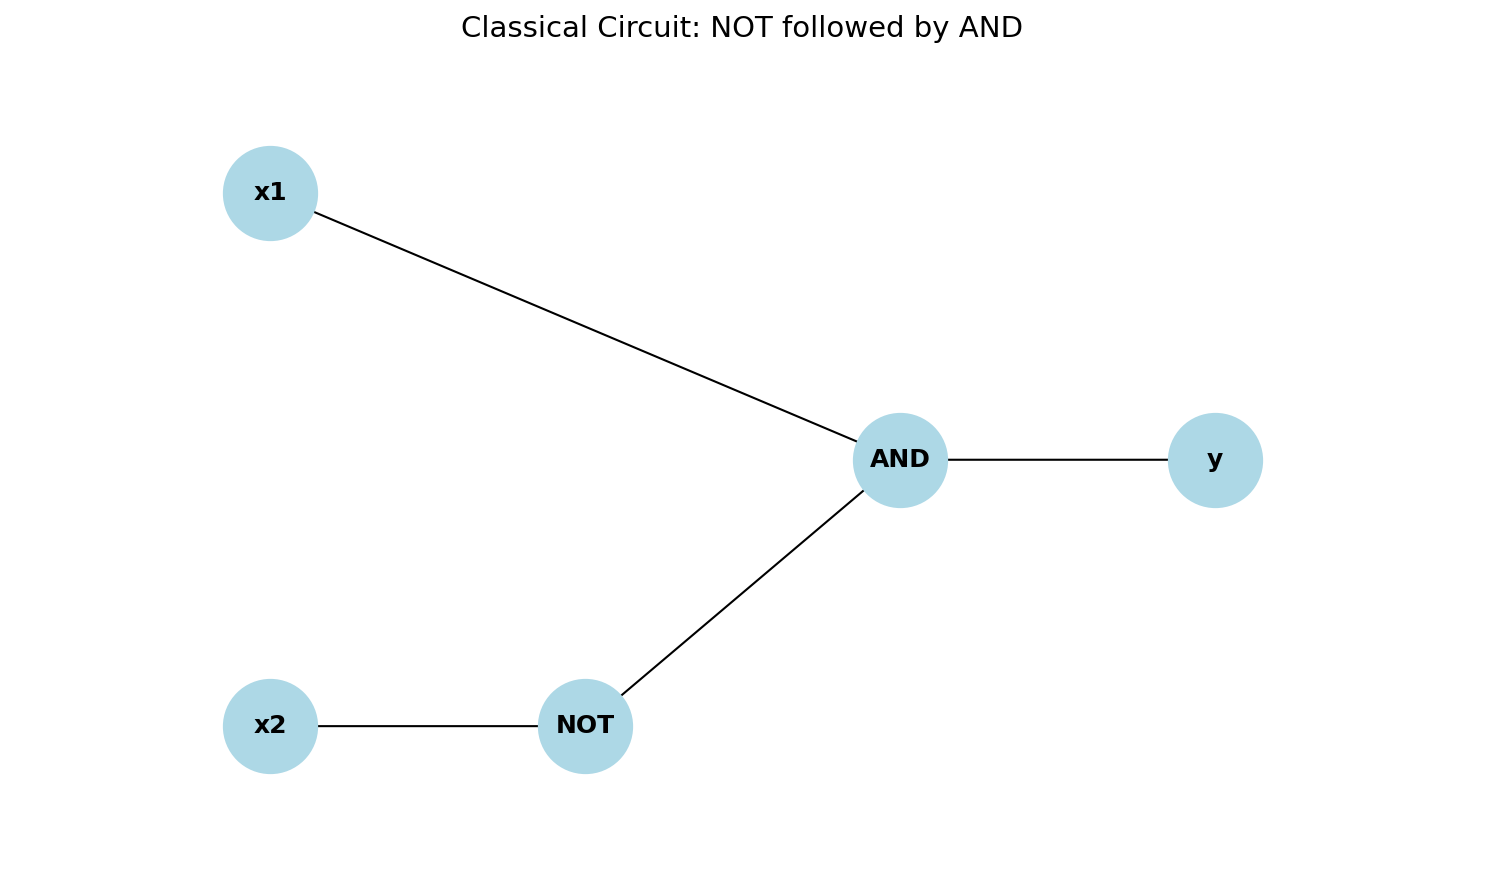

In [3]:
# Drawing the Classical Circuit above

import networkx as nx
import matplotlib.pyplot as plt

def draw_classical_circuit_large():
    """
    Draw a graphical representation of a simple classical circuit:
    
    Inputs: x1, x2
    x2 is inverted (NOT gate), then AND gate combines x1 and NOT(x2).
    Output: y
    
    This version creates a larger, higher-resolution image to avoid cropping.
    """
    # Create a directed graph
    G = nx.DiGraph()
    
    # Define nodes
    G.add_node("x1")
    G.add_node("x2")
    G.add_node("NOT")
    G.add_node("AND")
    G.add_node("y")

    # Add edges showing the flow of signals
    G.add_edge("x1", "AND")
    G.add_edge("x2", "NOT")
    G.add_edge("NOT", "AND")
    G.add_edge("AND", "y")

    # Define positions for a cleaner layout (adjusted for more spacing)
    pos = {
        "x1":  (0, 1),
        "x2":  (0, 0),
        "NOT": (1.5, 0),
        "AND": (3, 0.5),
        "y":   (4.5, 0.5)
    }

    # Create a figure with larger size and higher DPI
    plt.figure(figsize=(10, 6), dpi=150)

    # Draw the nodes
    nx.draw_networkx_nodes(
        G, pos, 
        node_size=2000,      # Adjust as you see fit
        node_color='lightblue'
    )
    
    # Draw the labels for nodes
    nx.draw_networkx_labels(
        G, pos, 
        font_size=12, 
        font_weight='bold'
    )

    # Draw the edges with arrows
    nx.draw_networkx_edges(
        G, pos, 
        arrowstyle='->', 
        arrowsize=20, 
        edge_color='black'
    )

    # Add a title (optional)
    plt.title("Classical Circuit: NOT followed by AND", fontsize=14)

    # Set margins so nodes are not cut off
    plt.gca().margins(0.2)
    plt.axis('off')  # Hide axis for a cleaner look

    # Use tight_layout to reduce clipping of labels
    plt.tight_layout()
    
    # Display the final figure
    plt.show()

if __name__ == "__main__":
    draw_classical_circuit_large()
